In [114]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [184]:
from deepSculpt.sculptor.components.grid import add_grid

import numpy as np

void_dim = 32

volumes_void = np.zeros((void_dim, void_dim, void_dim))

materials_void = np.zeros((void_dim, void_dim, void_dim))

separacion = 4

volumes_void, materials_void = add_grid(volumes_void=volumes_void, materials_void=materials_void, step=separacion, verbose=False)

In [185]:
materials_void

array([[['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ...,
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0']],

       [['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ...,
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0']],

       [['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ...,
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0']],

       ...,

       [['dimgrey', '0',

In [186]:
materials_void

array([[['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ...,
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0']],

       [['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ...,
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0']],

       [['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ...,
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0'],
        ['dimgrey', '0', '0', ..., '0', '0', '0']],

       ...,

       [['dimgrey', '0',


🔽 Just created a snapshot image[06-12-2022-15-28].png @ /home/juan-garassino/code/juan-garassino/deepSculpt

🔽 Just created a vectorial snapshot vectorial[06-12-2022-15-28].svg @ /home/juan-garassino/code/juan-garassino/deepSculpt


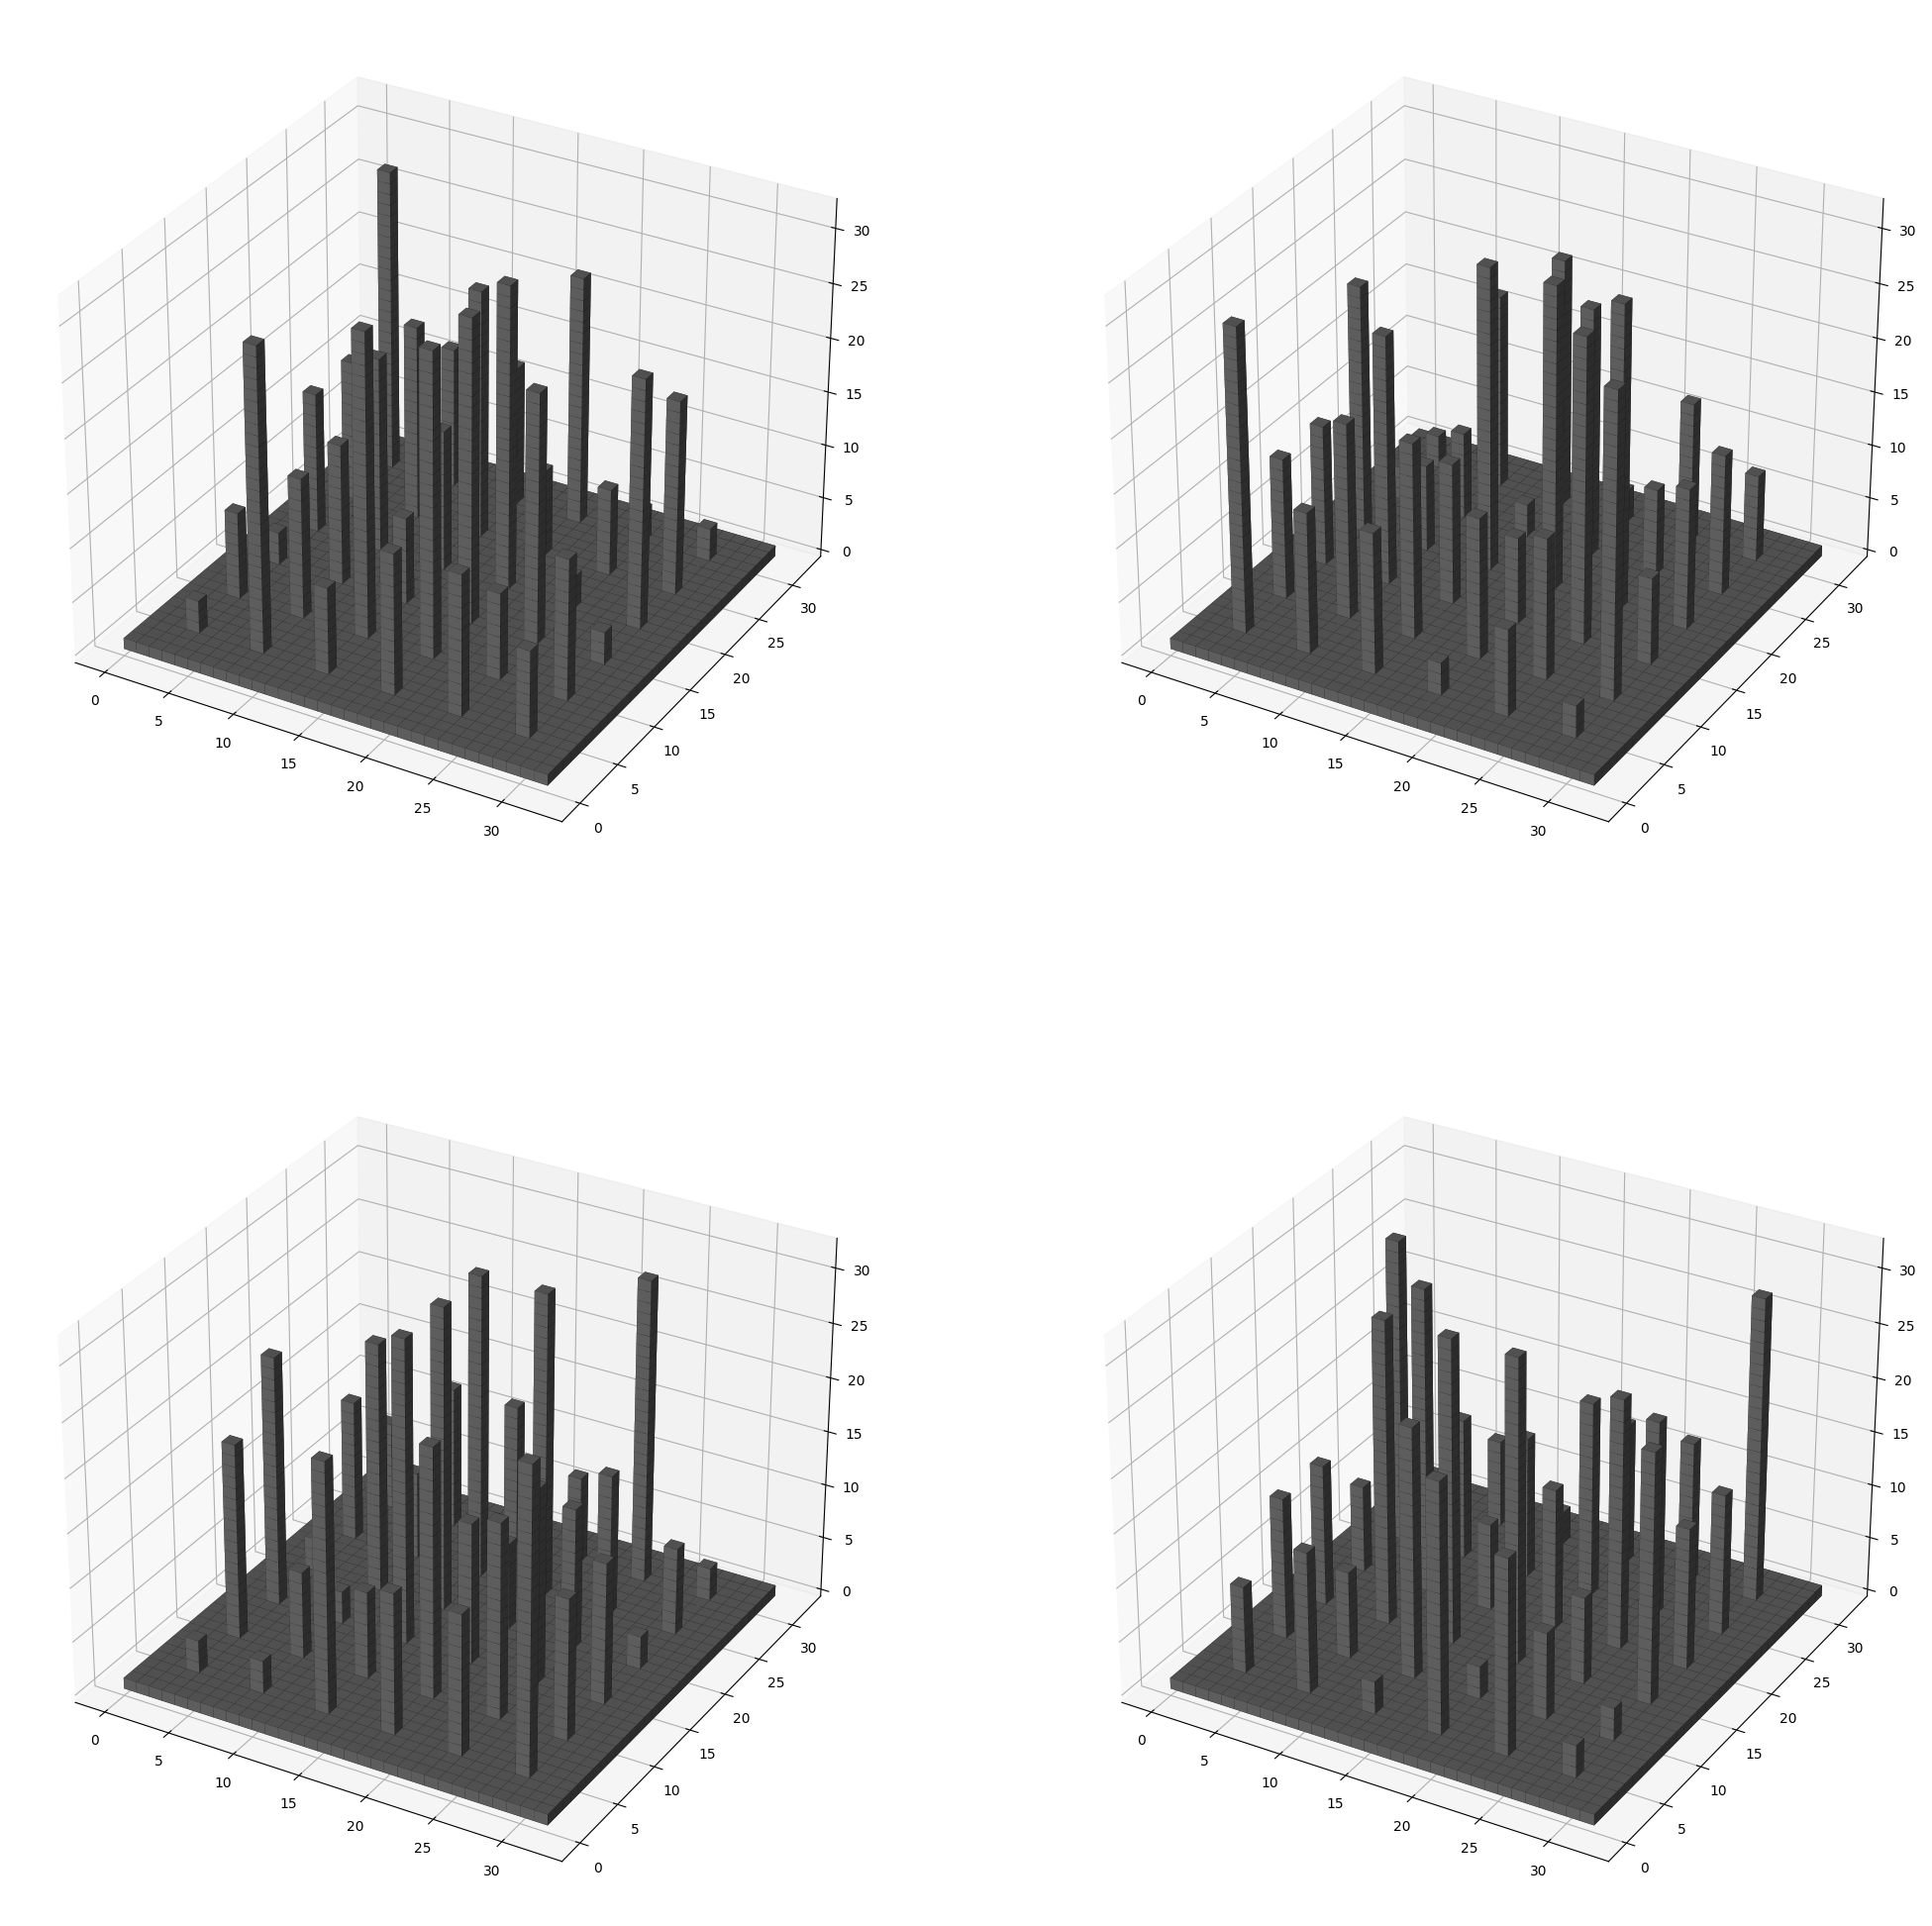

In [187]:
from deepSculpt.manager.tools.plotter import Plotter

plot = Plotter(volumes=volumes_void, colors=materials_void)

import os

out_dir = os.path.join(
                    os.environ.get("HOME"),
                    "code",
                    "juan-garassino",
                    "deepSculpt",
                )

plot.plot_sculpture(out_dir)

In [2]:
from deepSculpt.curator.tools.params import COLOR_EDGES, COLOR_PLANES, COLOR_VOLUMES

from deepSculpt.sculptor.sculptor import Sculptor

sculptor = Sculptor(
        void_dim=32,
        edges=(0, 0.7, 0.8), # number of elements, minimun, maximun
        planes=(8, 0.7, 0.8),
        volumes=(2, 0.7, 0.8),
        # grid=(2, 5), # minimun height of column, and maximun height
        materials_edges=COLOR_EDGES,
        materials_planes=COLOR_PLANES,
        materials_volumes=COLOR_VOLUMES,
        step=6,
        verbose=False,
    )

volumes, materials = sculptor.generative_sculpt()

adding grid
adding planes
adding planes
adding planes
adding planes
adding planes
adding planes
adding planes
adding planes
adding volumes
adding volumes



🔽 Just created a snapshot image[06-12-2022-15-54].png @ /home/juan-garassino/code/juan-garassino/deepSculpt

🔽 Just created a vectorial snapshot vectorial[06-12-2022-15-54].svg @ /home/juan-garassino/code/juan-garassino/deepSculpt


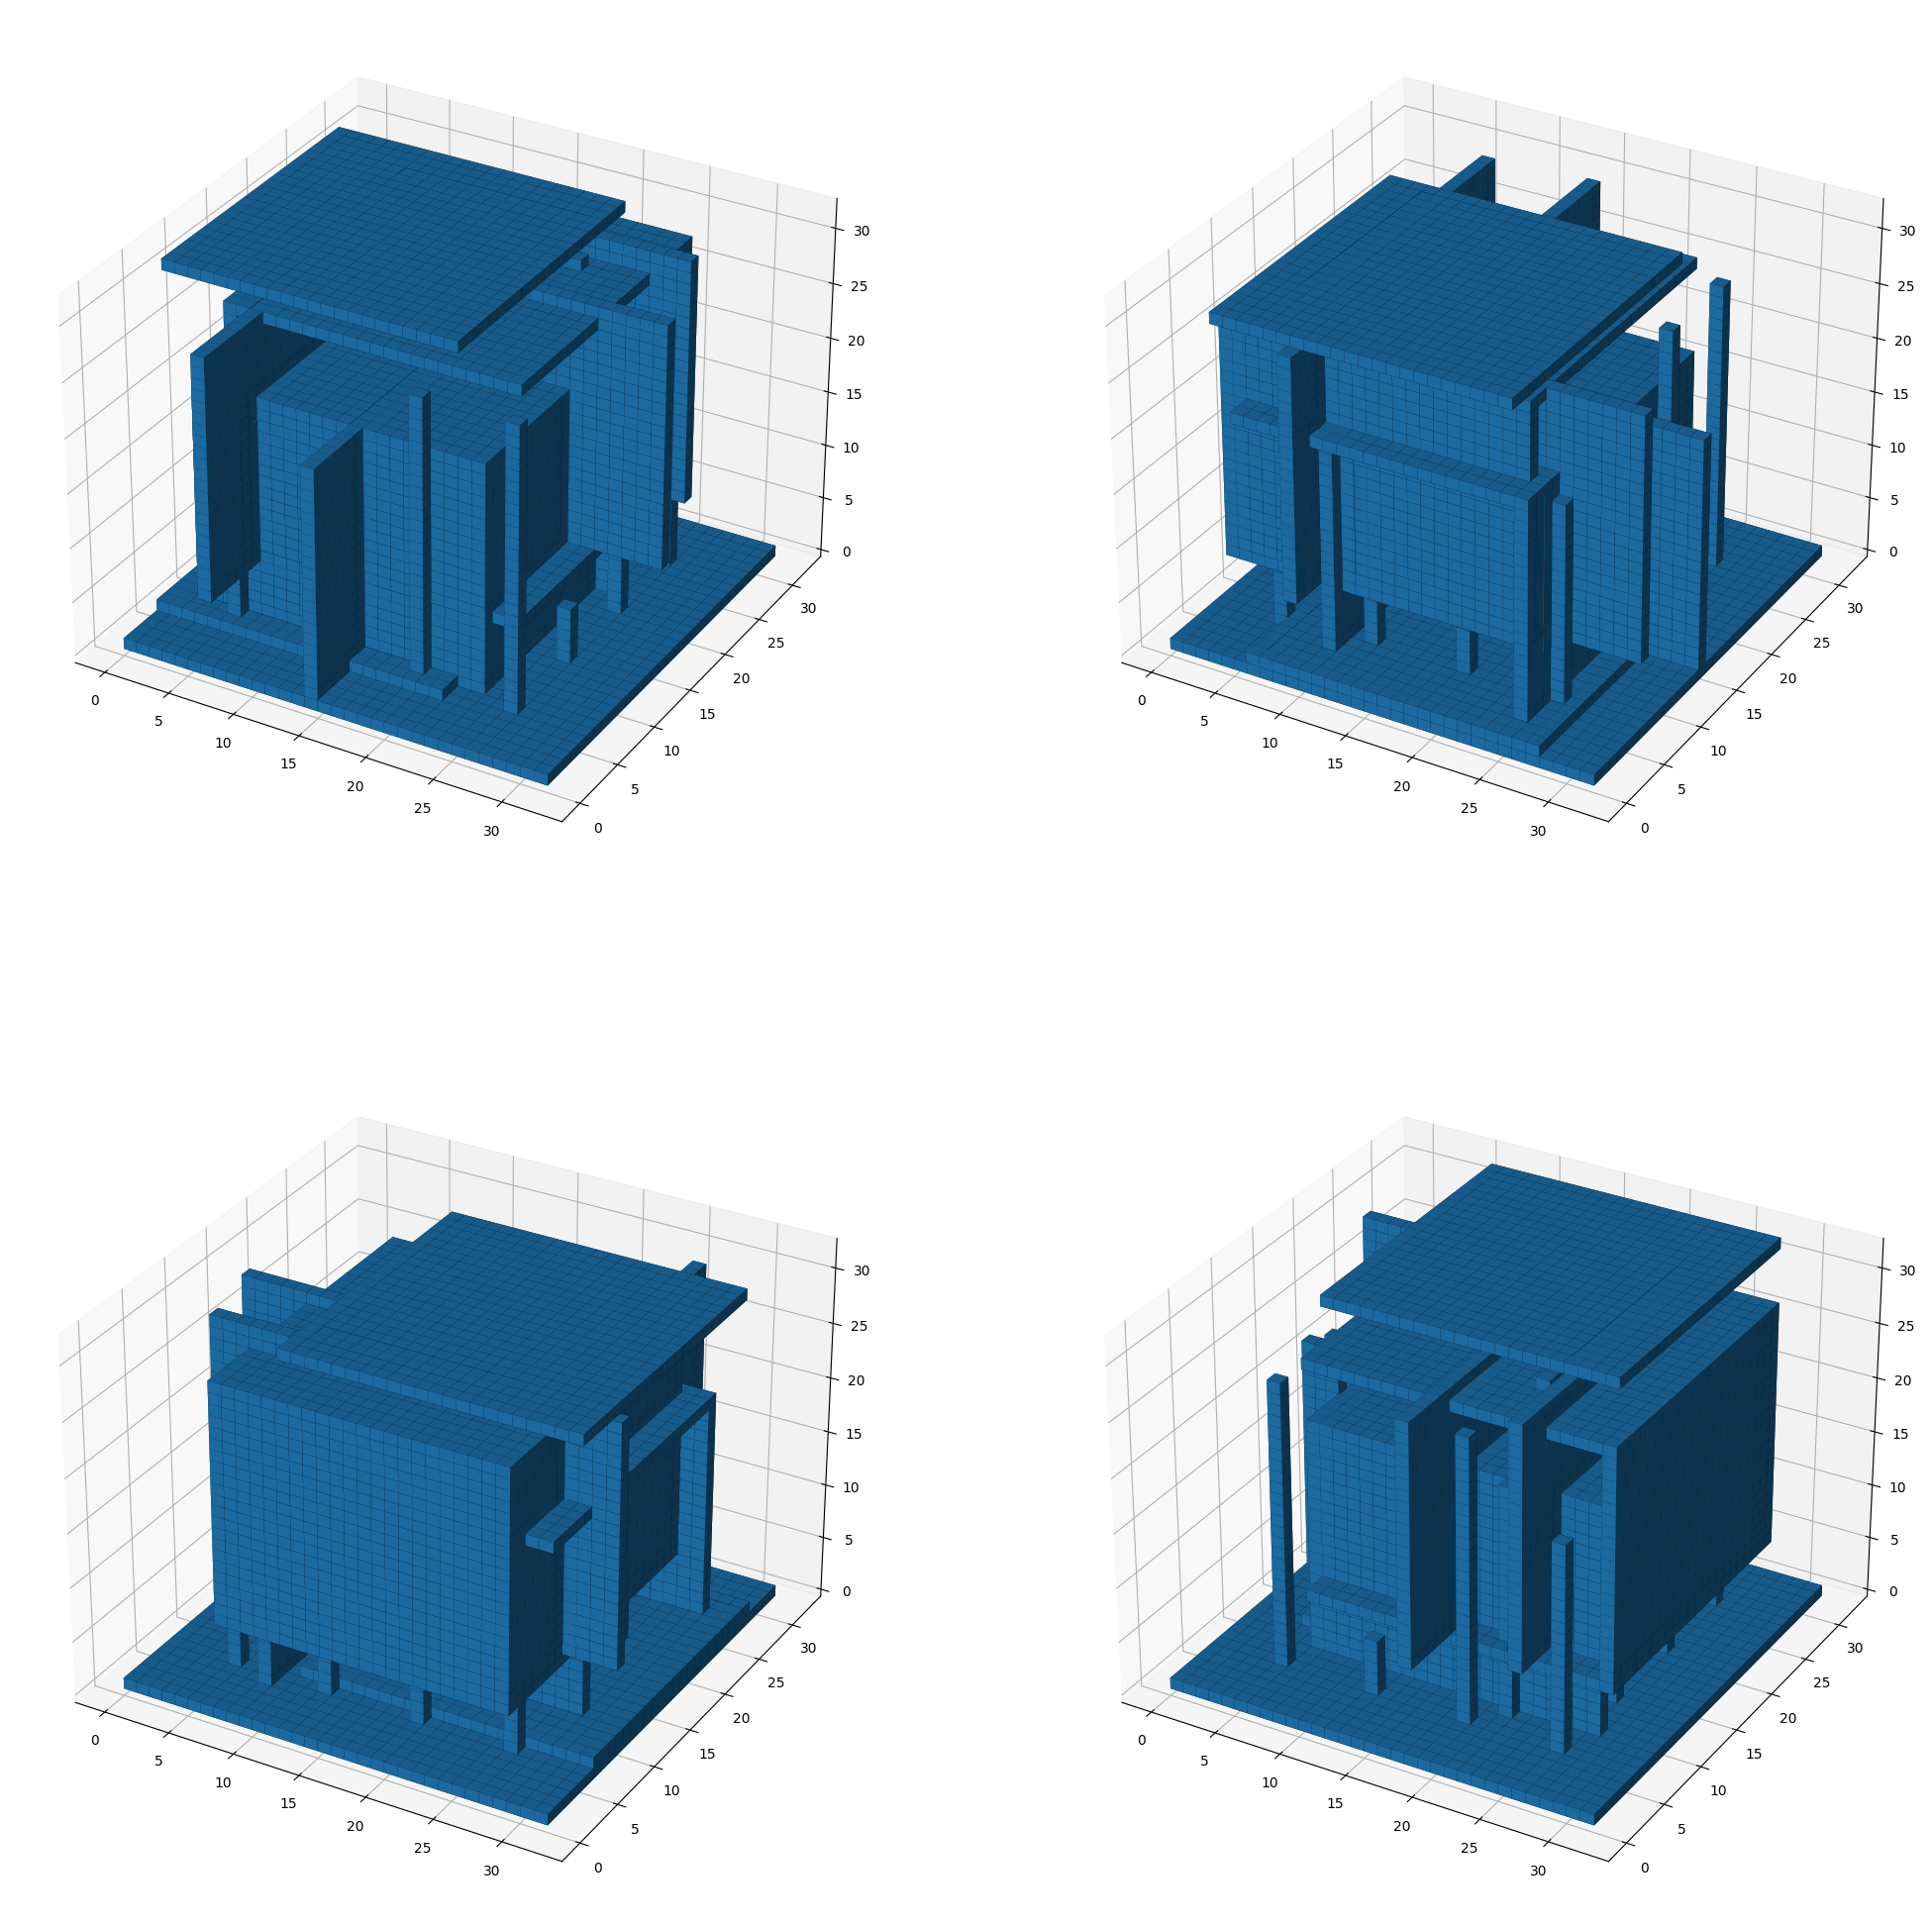

In [3]:
from deepSculpt.manager.tools.plotter import Plotter

plot = Plotter(volumes=volumes)#, colors=materials)

import os

out_dir = os.path.join(
                    os.environ.get("HOME"),
                    "code",
                    "juan-garassino",
                    "deepSculpt",
                )

plot.plot_sculpture(out_dir)

In [192]:
import numpy as np

import random

locations=[]

if void_dim % 2 == 0:
    
    left_position = void_dim / 2 - (separacion / 2)
    
    right_position = left_position + (separacion + 1)
    
    locations.append(left_position)
    
    locations.append(right_position)
    
    while left_position > 0 and right_position < (void_dim - (separacion + 1)):
        
        left_position = left_position - (separacion + 1)
        
        right_position = right_position +(separacion + 1)
        
        locations.append(left_position)
    
        locations.append(right_position)

if void_dim % 2 != 0:
    pass

X = np.array(sorted(locations)) - 1

Y = np.array(sorted(locations)) - 1

Z = np.array(random.choices(locations, k= len(X) * len(Y))).reshape((len(X), len(Y))) 

bases =  np.zeros((len(X) , len(Y),)).reshape((len(X),len(Y),1))

heights = Z.reshape((len(X),len(Y),1)) # random heights selected

grid = np.array(np.meshgrid(X, Y)).T # X Y grid created

column_top_coordinates = np.concatenate((grid, heights), axis=2).reshape((len(X) * len(Y),3)).astype('int8')

column_base_coordinates = np.concatenate((grid, bases), axis=2).reshape((len(X) * len(Y),3)).astype('int8')

verbose = False

if verbose:
    print(column_top_coordinates)
    print(column_base_coordinates)

for column_base_coordinate, column_top_coordinate in zip(list(column_base_coordinates), list(column_top_coordinates)):
    volumes_void[column_base_coordinate[0], column_base_coordinate[1], column_base_coordinate[2]:column_top_coordinate[2]] = 1

volumes_void[:,:,0] = 1

materials_R = np.where(volumes_void==1,105,0).reshape((32,32,32,1))

materials_B = np.where(volumes_void==1,105,0).reshape((32,32,32,1))

materials_G = np.where(volumes_void==1,105,0).reshape((32,32,32,1))

materials_void = np.concatenate((materials_R, materials_B, materials_G), axis=3, dtype=object).reshape((32,32,32,3))

ValueError: Invalid RGBA argument: 105

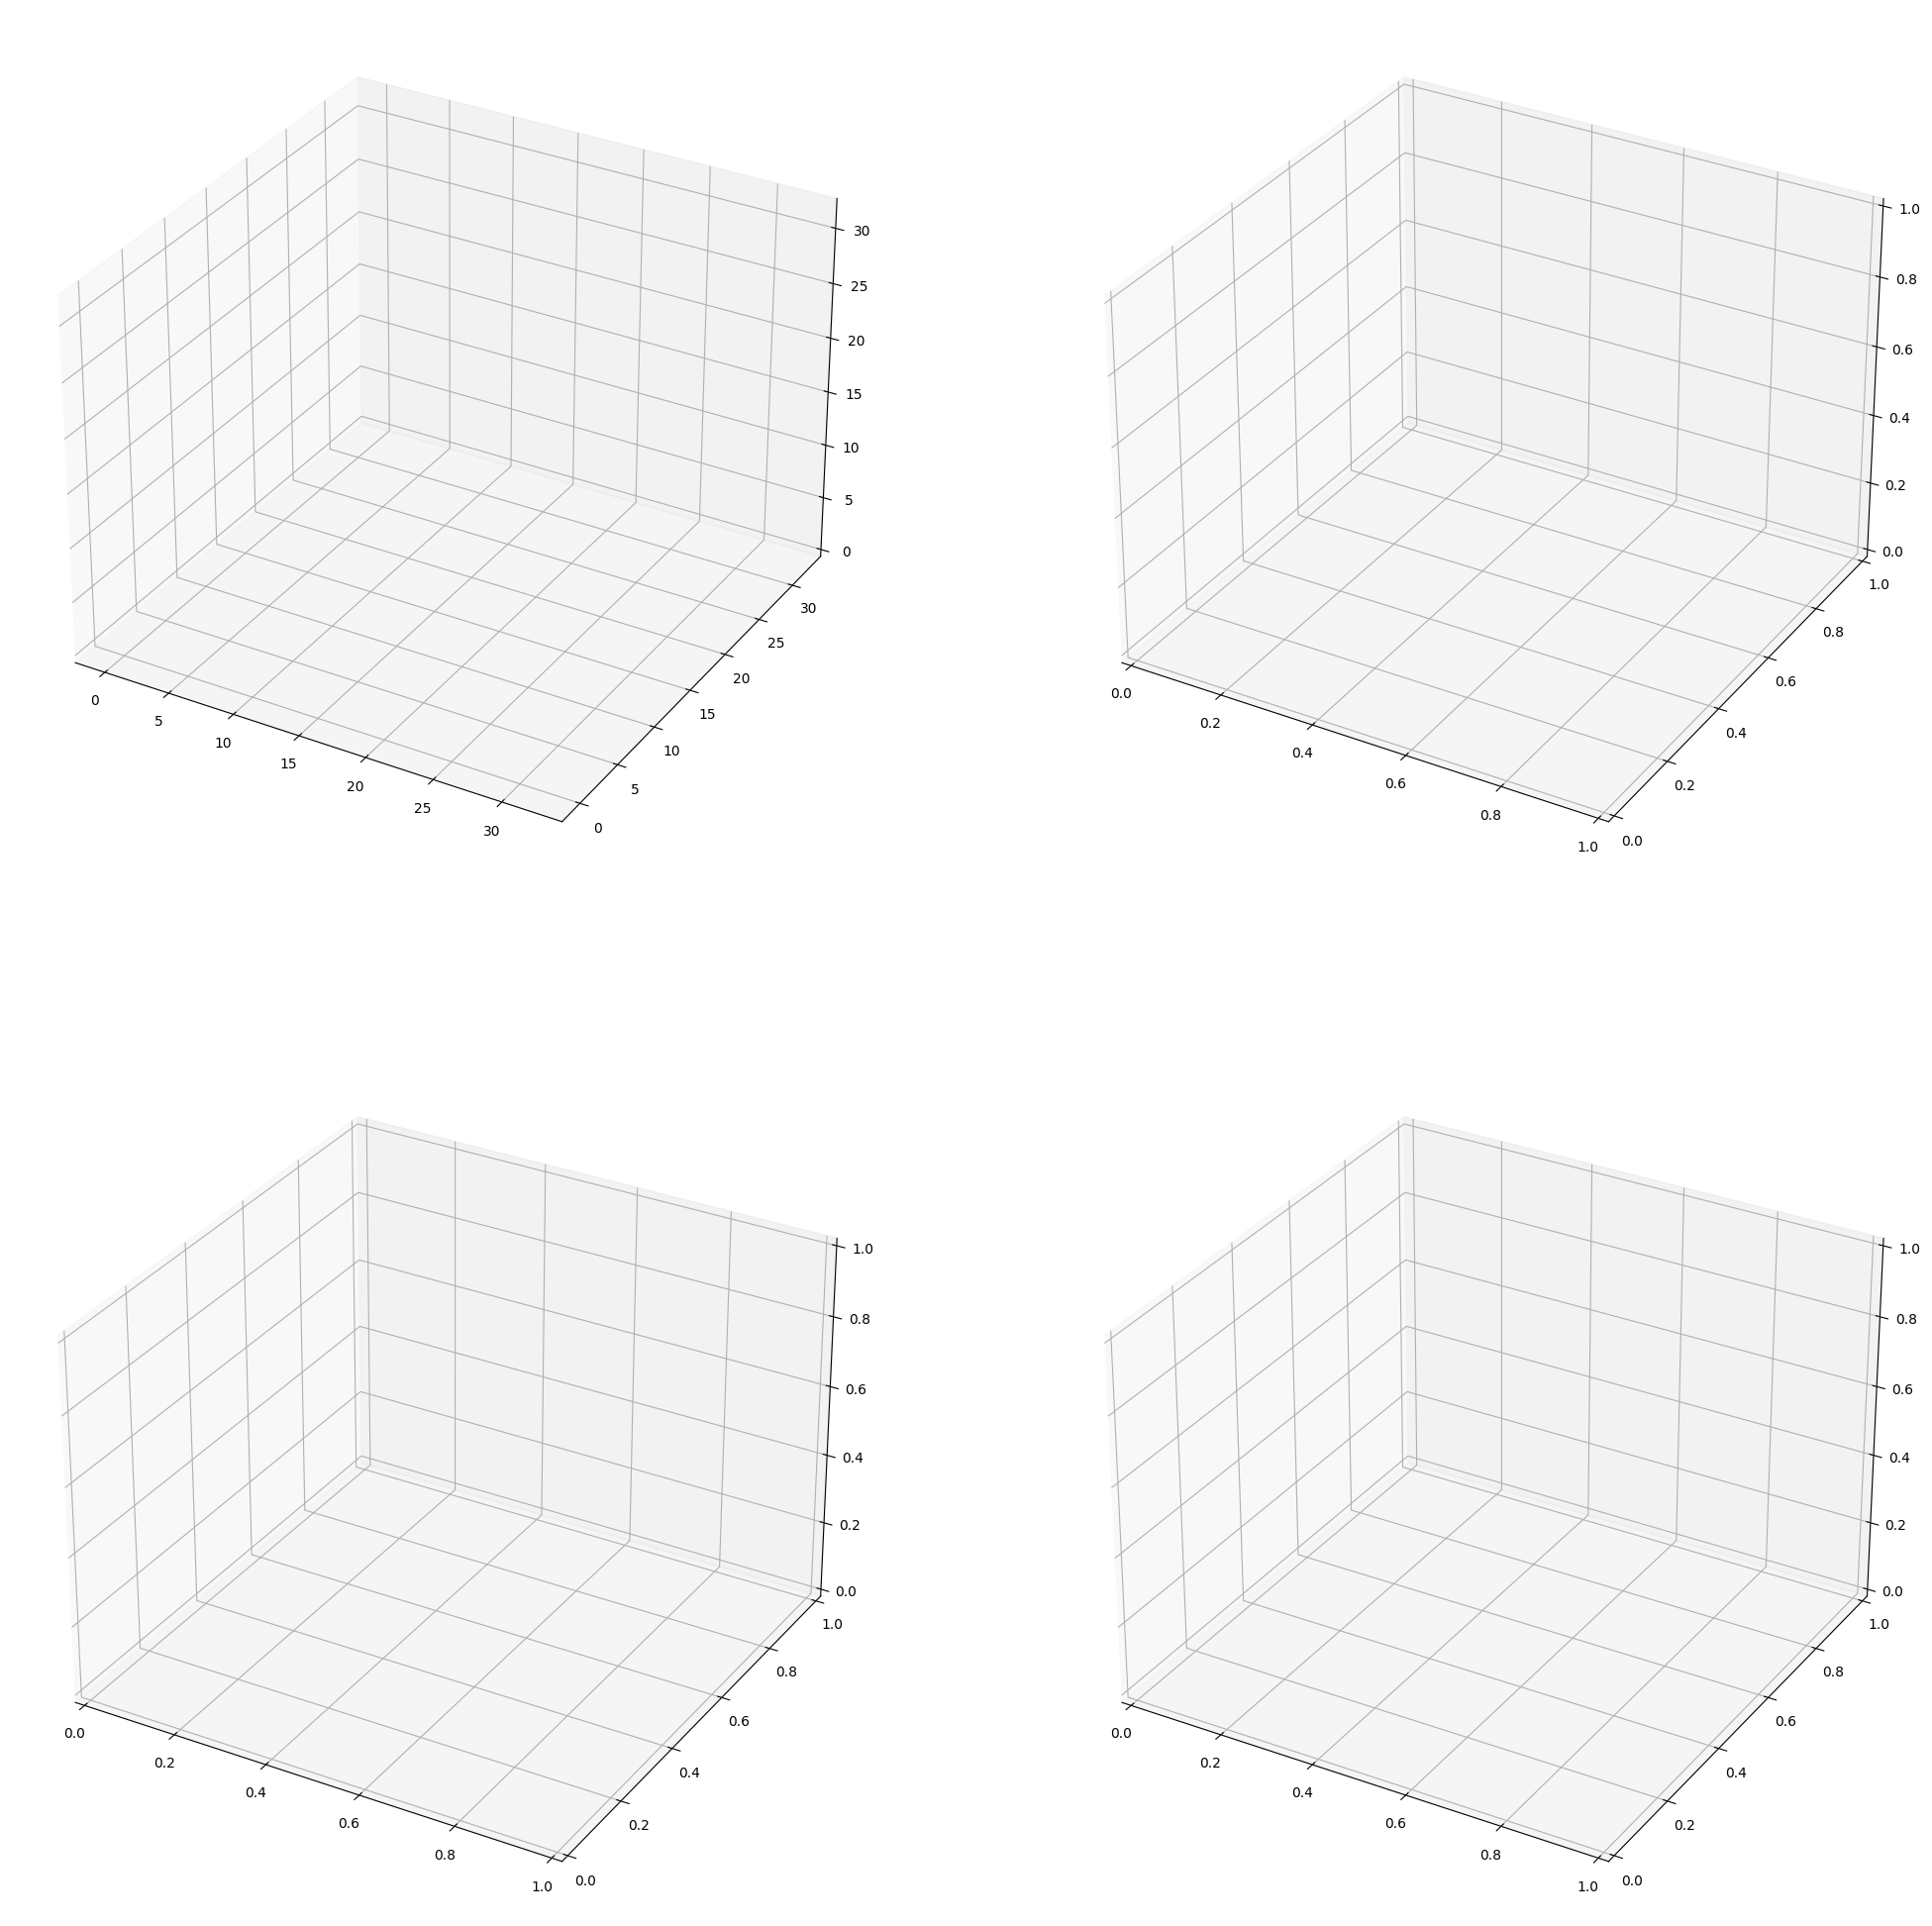

In [193]:
from deepSculpt.manager.tools.plotter import Plotter

plot = Plotter(volumes=volumes_void, colors=materials_void)

import os

out_dir = os.path.join(
                    os.environ.get("HOME"),
                    "code",
                    "juan-garassino",
                    "deepSculpt",
                )

plot.plot_sculpture(out_dir)